<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/6_Optimizadores/ejercicios/ejercicios_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Ejercicios de la clase 6

En este notebook vamos a tratar de ver de manera gráfica las diferencias entre los distintos optimizadores cuando la función a minimizar tiene una convergencia problemática para SGD.

## Ejercicio 1

Lo primero que haremos es definir la función a minimizar. En deep learning, está función siempre es la función de pérdida que depende de los parámetros. En este caso definiremos una función con dos parámetros `x` e `y` de la siguiente manera: 
$$F(x,y) = x^2 + 4xy + 100y^2 - 4y + 20x + 4$$

Defina una función de python que calcule el valor de $F(x,y)$ en la siguiente celda.

In [1]:
def F(x,y):
  return x ** 2 + 2 * x * y + 10 * y ** 2 + 2 * x - 4 * y + 4

El siguiente código genera las curvas de nivel de la función cuyo minimo se encuentra en $(-4/3, 1/3)$. Si la función está programada correctamente, el gráfico debería verse así.

 ![Imgur](https://i.imgur.com/8ZwZuZe.png)

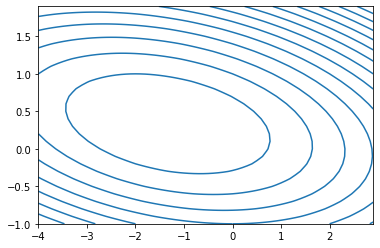

In [2]:
import torch
import matplotlib.pyplot as plt

#grilla de valores para x e y dentro de los límites del gráfico
x, y = torch.meshgrid(torch.arange(-4.0, 3.0, 0.1),
                      torch.arange(-1.0, 2.0, 0.1),
                      indexing='xy')
levels = torch.arange(2, 80.0, 4).detach()
plt.contour(x, y, F(x, y), levels = levels,colors='#1f77b4');

## Ejercicio 2

Genere una instancia de cada uno de los siguientes optimizadores:


1.   `SGD`
2.   `Adagrad`
3. `RMSprop`
4. `Adam`

Guarde las instancias en la lista `opt`




In [3]:
opt = [torch.optim.SGD,
       torch.optim.Adagrad,
       torch.optim.RMSprop,
       torch.optim.Adam]

## Ejercicio 3

Cree un tensor param que contenga los parámetros x e y de la función que deberán ser optimizados. Inicialicelos con valor $-4$ y $1$ respectivamente.

In [4]:
param = torch.tensor([-4.0,1.0], requires_grad=True)

## Ejercicio 4 
Utilizar los optimizadores guardados en la lista `opt` para modificar los parámetros `param` tratando de minimizar la función `F(x,y)`. 

"Entrene" por 20 epochs y almacene en una lista `results_i` los valores de `param` en cada una de esas 20 epochs. Por último almacene la lista `results_i` correspondiente a cada optimizador en una lista llamada `all_results`.

In [13]:
all_results = []
for i in range(len(opt)):
  results_i = []
  a = torch.tensor([-4.0,1.0], requires_grad=True)
  results_i.append((float(a[0]),float(a[1])))
  trainer = opt[i]([a], lr=0.1)
  for e in range(30):
    loss = F(a[0],a[1])
    trainer.zero_grad()
    loss.backward()
    trainer.step()
    results_i.append((float(a[0]),float(a[1])))
  all_results.append(results_i)


Si su código no tiene errores, la siguiente celda se encargará de graficar todos los optimizadores en un solo plot.

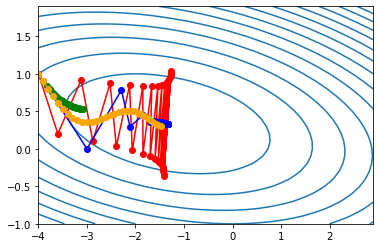

In [14]:
colors = ['red','green','blue','orange']
for i in range(len(opt)):
  plt.plot(*zip(*all_results[i]), '-o', color=colors[i])

x, y = torch.meshgrid(torch.arange(-4.0, 3.0, 0.1),
                      torch.arange(-1.0, 2.0, 0.1),
                      indexing='xy')
levels = torch.arange(2, 80.0, 4).detach()
plt.contour(x, y, F(x, y), levels = levels,colors='#1f77b4');